In [34]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd

import tensorflow as tf

from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split


In [35]:
mura_Dir = "MURA-v1.1/"
train_imgs_path=pd.read_csv(mura_Dir+'train_image_paths.csv',names=["Train Dataset"])
train_labels=pd.read_csv(mura_Dir+'train_labeled_studies.csv',names=["Train Labeled Studies","label"])
test_imgs_path=pd.read_csv(mura_Dir+'valid_image_paths.csv',names=["Test Dataset"])
test_labels=pd.read_csv(mura_Dir+'valid_labeled_studies.csv',names=["Test Labeled Studies","labels"])

In [36]:
train_imgs_path=train_imgs_path.sort_values(by=['Train Dataset'])
train_labels=train_labels.sort_values(by=['Train Labeled Studies'])
test_imgs_path=test_imgs_path.sort_values(by=['Test Dataset'])
test_labels=test_labels.sort_values(by=['Test Labeled Studies'])

In [37]:
test_labels['Body Part']=test_labels['Test Labeled Studies'].apply(lambda x: str(x.split('/')[2])[3:])
test_labels['Study Type']=test_labels['Test Labeled Studies'].apply(lambda x: str(x.split('/')[4])[:6])

In [38]:
train_labels['Body Part']=train_labels['Train Labeled Studies'].apply(lambda x: str(x.split('/')[2])[3:])
train_labels['Study Type']=train_labels['Train Labeled Studies'].apply(lambda x: str(x.split('/')[4])[:6])

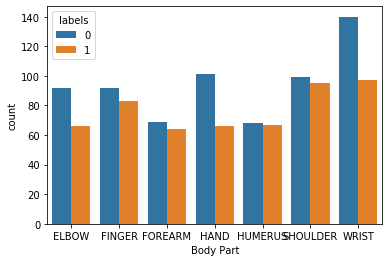

In [39]:
import seaborn as sns
sns.countplot(data=test_labels,x='Body Part',hue='labels')

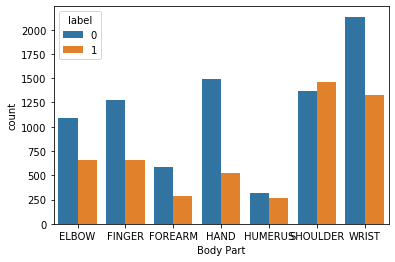

In [40]:
sns.countplot(data=train_labels,x='Body Part',hue='label')

In [83]:
import glob
import cv2


In [85]:
def fileImagesOfStudy(path):
    img_dir = path # Enter Directory of all images 
    data_path = os.path.join(img_dir,'*g')
    files = glob.glob(data_path)
    data = []
    i=0
    for f1 in files:
        i=i+1
        img = cv2.imread(f1)
        data.append(img)
           
    return data

In [86]:
def show_images(images, cols = 1, titles = None):
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

In [87]:
def stretching_Data(files_,dim):
    stretch=[]
    for e in range(0,len(files_)):
        f=files_.iloc[e][0]
        dd=fileImagesOfStudy(f)
        for n in range(0,len(dd)):
            stretch.append(cv2.resize(dd[n],dsize=dim))
               
    return stretch

In [88]:
def stretching_Labels(labels_):
    labels=[]
    for e in range(0,len(labels_)):
        l=labels_['label'][e]
        f=labels_.iloc[e][0]
        dd=fileImagesOfStudy(f)
        for n in range(0,len(dd)):
            labels.append(l)
    return labels

In [89]:
e=5
l=train_labels['label'][e]
f=train_labels.iloc[e][0]
print(f)

MURA-v1.1/train/XR_ELBOW/patient00044/study1_negative/


In [ ]:
labels_train=stretching_Labels(train_labels)
t_y=np.array(labels_train)

In [ ]:
mobile_dim=(150,150)
stretchData_Mobile=stretching_Data(train_labels,mobile_dim)
train_X=np.array(stretchData_Mobile)

In [37]:
t_y.shape

(31265,)

In [38]:
train_X.shape

(31265, 150, 150, 3)

In [41]:
train_labels_ELbow = train_labels[train_labels['Body Part'] =='ELBOW']



In [45]:
mobile_dim=(150,150)
stretchData_Mobile_Elbow=stretching_Data(train_labels_ELbow,mobile_dim)


In [50]:
train_X_Elbow=np.array(stretchData_Mobile)
train_X_Elbow.shape

(4931, 150, 150, 3)

In [5]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os


In [6]:
import tensorflow as tf

keras = tf.keras

In [12]:
import tfplot
